# AM10 - Spring 2020
# LECTURE-08

## Module: Elementary

### Learning objectives:
Second-order Ordinary Differential Equations: Euler's method, sinuisoidal functions, Runge-Kutta method.

_______________________________________________________________________

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Second-order differential equations


A second-order ODE is then given by:

$$ \frac{d^2 u}{dx^2} = g(x,u,u') $$

where $g(u,u',x)$ is a given function of the function $u$, its first derivative $$u'=\frac{du}{dx}, $$ and the variable $x$.  We also need to know the value of the function $u(x)$ and its derivative $u'(x)$ for some specific value of $x$ (the "initial" or "boundary" conditions), so that we can try to solve for the function $u(x)$ that satisfies this equation. 

#### 1a. Euler's method

The simplest numerical solution would be to use the expression for the derivative of the function $u(x)$:

$$ \frac{d^2 u}{dx^2} = \lim_{\Delta x \to 0} \left [ \frac{u'(x+\Delta x) - u'(x)}{\Delta x} \right ] = \lim_{\Delta x \to 0} \left [ \frac{1}{\Delta x} \left \{ 
\frac{u(x+2\Delta x) - u(x+\Delta x)}{\Delta x} - \frac{u(x+\Delta x) - u(x)}{\Delta x}
\right \} \right ] $$

$$ = \lim_{\Delta x \to 0} \left [ 
\frac{u(x+2\Delta x) - 2 u(x+\Delta x) + u(x)}{(\Delta x)^2}\right ]$$ 

and use three successive values of $x$ in an array of values, 
call them $x_{n+2}$, $x_{n+1}$ and $x_{n}$, 
differing by $\Delta x = x_{n+1}-x_{n} = x_{n+2}-x_{n+1}$, which then gives for the differential equation:

$$\frac{u(x_{n+2}) - 2 u(x_n+1)+ u(x_n)}{(\Delta x)^2} = g(x_n, u(x_n), u'(x_n)) \Rightarrow $$
$$u(x_{n+2}) = 2 u(x_{n+1}) - u(x_n) + (\Delta x)^2 \cdot g(x_n, u(x_n), u'(x_n))$$

This expression is useful only if we know the function $u(x)$ at two points, namely at $x_{n+1}$ and $x_n$, as well as its derivative $u'(x)$ at $x_n$. We want to reduce this dependence of the expression for $u(x_{n+2})$ on multiple values of $x$.

To this end, we use our knowledge of the derivative expression:

$$\frac{du}{dx} = \lim_{\Delta x \to 0} \left [ \frac{u(x+\Delta x) - u(x)}{\Delta x} \right ]
\Rightarrow u(x_{n+1}) - u(x_n) = \Delta x \cdot u'(x_n)$$

which when substituted in the above expression gives: IMPORTANT

$$u(x_{n+2}) = u(x_n) + 2 \Delta x \;  u'(x_n) + (\Delta x)^2 \cdot g(u(x_n), u'(x_n), x_n)$$

which on the right-hand-side has expressions that depend only on ONE value of the variable $x$, namely $x_n$.  It also shows clearly that we need to know both the function $u(x)$ and its derivative $u'(x)$ at some point in order to propagate the values. However, this is problematic because is gives the function at points differing by $2 \Delta x$ (the coefficient of the second term) and it also involves the small quantity $\Delta x$ in the second power (the coefficient of the third term). 

An approach that avoids these problems is to use the three-point formula for the derivative twice, first for the function itself, and then for the first derivative:

$$u(x_{n+1})=u(x_{n-1}) + 2 \; \Delta x \; u'(x_n)$$

$$u'(x_{n+1})=u'(x_{n-1}) + 2 \; \Delta x \; g(x_n, u(x_n), u'(x_n))$$

because both these expressions involve the small quantity $\Delta x$ only to the first power. The only problem is that now we need not only $u(x_0)$ and $u'(x_0)$, the intitial values, to get the iterative solution started, but also the values $u(x_1)$ and $u'(x_1)$, which are presumably not known.  These can be obtained by extrapolation:

$$\frac{u(x_1)-u(x_0)}{\Delta x} = u'(x_0)\Rightarrow u(x_1) = u(x_0) + \Delta x \; u'(x_0)$$

$$\frac{u'(x_1)-u'(x_0)}{\Delta x} = u''(x_0) = g(x_0, u_0, u'_0) 
\Rightarrow u'(x_1) = u'(x_0) + \Delta x \cdot g(x_0, u_0, u'_0)$$

#### Example:

We'll try the following second-order equation:

$$\frac{d^2 u}{dx^2} = x u' - 4 u$$

with $x_0=-1$, $u(x_0)=-2$, $u'(x_0)=8$. In this case $g(x,u,u') = x u'-4 u$.

The solution of this equation is:

$$u(x) = x^4 - 6 x^2 + 3$$

as can be easily checked.  We compare below the numerical with the exact solution.

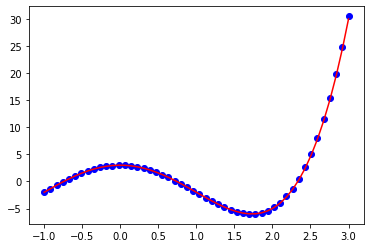

In [7]:
Nx = 50
xmin=-1.
xmax=3.
x=np.linspace(xmin,xmax,Nx)
dx=x[1]-x[0]
dx2=2.*dx
uf=np.zeros(Nx) # function u(x)
ud=np.zeros(Nx) # First derivative of u(x)
gf=np.zeros(Nx) # function g(x,u',u'')

utrue = (x**4) - 6. * (x**2) + 3. # actual solution to DE

# Initial conditions
uf[0] = -2.
ud[0] = 8.
gf[0] = x[0] * ud[0] - 4. * uf[0]

uf[1] = uf[0] + ud[0] * dx
ud[1] = ud[0] + gf[0] * dx

for n in range(1, Nx-1):
    gf[n] = x[n] * ud[n] - 4*uf[n]
    ud[n+1] = ud[n-1] + dx2 * gf[n]
    uf[n+1] = uf[n-1] + dx2 * ud[n]
    
plt.plot(x, uf, 'bo')
plt.plot(x, utrue, 'r-')
plt.show()

### 2. An eigenfunction problem

A very important case is:

$$ \frac{d^2 u}{dx^2} = -a^2 u \Rightarrow g(x,u,u') = -a^2 u  $$

where $a$ is a constant.  In this case, the differential operator $d^2/dx^2$ applied to the function $u(x)$ gives back the function times a constant, $-a^2$: this is an "eigenfunction" of the operator.  

There are two functions, namely the sine and cosine $\sin(ax), \cos(ax)$, which when multiplied by an arbitrary constant each $A$ or $B$, exactly satisfies the above equation, for any value of the given constant $a$. For a general solution, we then take a linear combination of these two possibilities:

$$u(x) = A \sin(ax) + B \cos(ax)$$

Thus, the only quantities we need to specify in order to have a complete solution are the values of the constants $A$ and $B$, that's why we need two pieces of information. These could be the values of the function $u(x)$ at two different points $x_1,x_2$, or the value of the function and its derivative $u'(x)$ at one point $x_0$, or some combination of these. 

For example, if we know $u(x_0) = u_0$ and $u'(x_0) = u'_0$ then we have:

$$ u_0 = A \sin(a x_0) + B \cos(a x_0), \; \; \; u'_0=a \left [ A \cos(a x_0) - B \sin(a x_0) \right ]$$

which is a system of two equations and two unknowns, $A$ and $B$.

In most cases we are not so lucky to know the function $u(x)$ that satisfies the equation up to some easily determined constants, so we resort to numerical solution. 

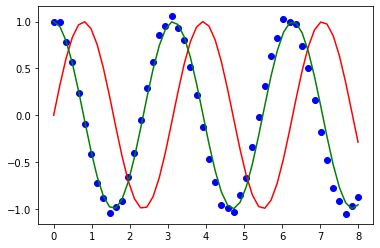

In [19]:
Nx = 50
xmin=0.0
xmax=8.0
x=np.linspace(xmin,xmax,Nx)
dx=x[1]-x[0]
dx2=2.*dx
uf1=np.zeros(Nx) # function u(x)
ud1=np.zeros(Nx) # First derivative of u(x)
gf1=np.zeros(Nx) # function g(x,u',u'')

a = 2.
asq = a * a # a squared
A = 1.

utrue1 = A * np.sin(a*x) # actual solution to DE
utrue2 = A * np.cos(a*x)

# Initial conditions
uf1[0] = A
ud1[0] = 0.
gf1[0] = - asq * uf1[0]

uf1[1] = uf1[0] + ud1[0] * dx
ud1[1] = ud1[0] + gf1[0] * dx

for n in range(1, Nx-1):
    gf1[n] = - asq * uf1[n]
    ud1[n+1] = ud1[n-1] + dx2 * gf1[n]
    uf1[n+1] = uf1[n-1] + dx2 * ud1[n]
    
plt.plot(x, uf1, 'bo')
plt.plot(x, utrue1, 'r-') # sine
plt.plot(x, utrue2, 'g-') # cosine
plt.show()

#### 2a. The Runge-Kutta method

Starting with second-order equation, 
we can break it up to a couple of first-order equations:

$$\frac{d^2 u}{d x^2} = g(x,u,u')$$

$$\frac{d u}{d x} = v 
\Rightarrow 
\frac{d v}{dx} = \frac{d^2 u}{d x^2} = g(u,v,x) $$

Now we deal with the two coupled first-order equations, and use the fourth-order RK method:

$$\frac{d u}{dx} = v, \; \; \; \frac{d v}{dx} = g(x,u,v)$$

$$k^{(1)}_n =v_n, \; \; \; l^{(1)}_n =g(x_n,u_n,v_n)$$

$$k^{(2)}_n=v_n+\frac{h l^{(1)}_n}{2},\; \; \; 
l^{(2)}_n=g(x_n+\frac{h}{2},u_n+\frac{h k^{(1)}_n}{2}, v_n+\frac{h l^{(1)}_n}{2} )$$ 

$$k^{(3)}_n=v_n+\frac{h l^{(2)}_n}{2}, \; \; \; l^{(3)}_n=g(x_n+\frac{h}{2},u_n+\frac{h k^{(2)}_n}{2},v_n+\frac{h l^{(2)}_n}{2}  )$$

$$k^{(4)}_n = v_n+h l^{(3)}_n, \; \; \; 
l^{(4)}_n = g(x_n+h,u_n+h k^{(3)}_n, v_n+h l^{(3)}_n)
$$ 

$$u_{n+1} = u_n + \frac{h}{6} \left [ k^{(1)}_n + 2 \; k^{(2)}_n + 2 \; k^{(3)}_n + k^{(4)}_n 
\right ], \; \; \; 
v_{n+1} = v_n + \frac{h}{6} \left [ l^{(1)}_n + 2 \; l^{(2)}_n + 2 \; l^{(3)}_n + l^{(4)}_n 
\right ]
$$



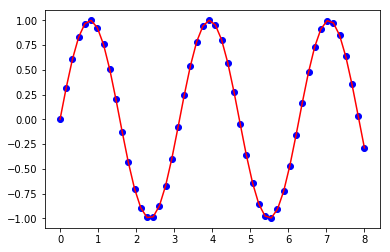

In [6]:
# Redo the sine/cosine function with the RK method
# g(x,u,v) = -a**2 u, f(x,u,v) = v
# Apply this for Nx=50, xmax=8.0, and compare to previous case with the same parameters. 

Nx=50
xmin=0.0
xmax=8.0
x=np.linspace(xmin,xmax,Nx)
dx=x[1]-x[0]
dx2=dx*2.0
uf3=np.zeros(Nx)
ud3=np.zeros(Nx)


a=2.0
asq=-a**2
Afact=1.0
ovr6=1.0/6.0

uf3[0]=0.0
ud3[0]=Afact*a
ut3=Afact*np.sin(a*x)

#
# Now propagate to the end of the interval, to find u(x)
#
for n in range(Nx-1):
    vn=ud3[n]
    un=uf3[n]
    
    k1n=vn
    l1n=asq*un
    
    k2n=(vn+dx*l1n/2.0)
    l2n=asq*(un+dx*k1n/2.0)
    
    k3n=(vn+dx*l2n/2.0)
    l3n=asq*(un+dx*k2n/2.0)
    
    k4n=(vn+dx*l3n)
    l4n=asq*(un+dx*k3n)
    
    uf3[n+1]=uf3[n]+ovr6*dx*(k1n+2.0*k2n+2.0*k3n+k4n)
    ud3[n+1]=ud3[n]+ovr6*dx*(l1n+2.0*l2n+2.0*l3n+l4n)

    
plt.plot(x,uf3,'bo')
plt.plot(x,ut3,'r-')
plt.show()
